# Naive-Bayes model using title data vectorized with word2vec

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [3]:
#import data

%store -r x_title_train_wv_2d
%store -r x_title_test_wv_2d
%store -r y_title_train_wv
%store -r y_title_test_wv

In [4]:
#rename variables for ease of use

x_train =  x_title_train_wv_2d
x_test =  x_title_test_wv_2d
y_train = y_title_train_wv
y_test = y_title_test_wv

### Multinomial Naive Bayes

In [5]:
#scale data with to make usable for Multinomial NB

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

In [6]:
#define model

mnb = MultinomialNB()

In [7]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [8]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [9]:
#cross validate on training set to check model stability

cv_scores_w2v_title_mnb = cross_validate(mnb, x_train_scaled, y_train, cv = k_folds, scoring=scorer)

In [10]:
#check cross validation scores

cv_scores_w2v_title_mnb

{'fit_time': array([0.09873581, 0.09574437, 0.08975744, 0.07479763, 0.08577061]),
 'score_time': array([0.03494096, 0.03690124, 0.03291273, 0.03191543, 0.031914  ]),
 'test_accuracy': array([0.65662357, 0.66174677, 0.65963157, 0.65645968, 0.6618275 ]),
 'test_precision': array([0.90655106, 0.89468779, 0.8897127 , 0.91569767, 0.87601078]),
 'test_recall': array([0.25717409, 0.26519337, 0.26438998, 0.25721285, 0.27015794]),
 'test_f1_score': array([0.40068129, 0.40911997, 0.40764331, 0.40161496, 0.41296061])}

In [11]:
#fit model on the whole training set
start = process_time()

mnb.fit(x_train_scaled, y_train)

end=process_time()

In [12]:
#test model on test set

y_pred = mnb.predict(x_test_scaled)

In [13]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     14028
           1       0.40      0.87      0.54      3539

    accuracy                           0.71     17567
   macro avg       0.67      0.77      0.66     17567
weighted avg       0.84      0.71      0.74     17567



In [14]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Multinomial Naive Bayes model with Title Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

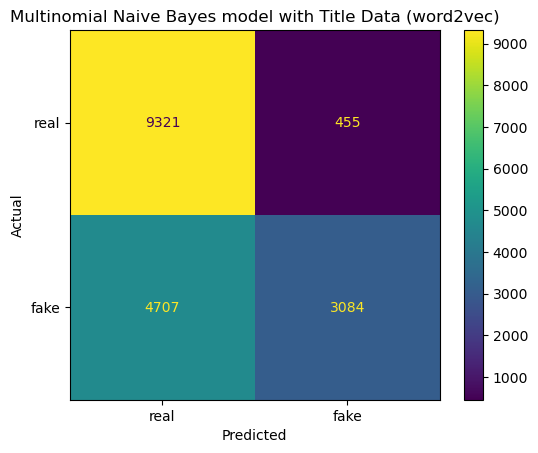

In [15]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Multinomial Naive Bayes model with Title Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [16]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [17]:
dict = {'data type': 'title',
        'model type':'multinomial Naive Bayes',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [18]:
w2v_title_mnb=pd.DataFrame.from_dict([dict])

In [21]:
w2v_title_mnb

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,multinomial Naive Bayes,word2vec,0.706154,0.871433,0.395841,0.544395,0.09375


In [22]:
#save results for later use

%store w2v_title_mnb

Stored 'w2v_title_mnb' (DataFrame)


### Gaussian NB


In [23]:
#define model

gnb = GaussianNB()

In [24]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [25]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [26]:
#cross validate on training set to check model stability

cv_scores_w2v_title_gnb = cross_validate(gnb, x_train, y_train, cv = k_folds, scoring=scorer)

In [27]:
#check cross validation scores

cv_scores_w2v_title_gnb

{'fit_time': array([0.18251252, 0.18150902, 0.1934824 , 0.20046473, 0.15458465]),
 'score_time': array([0.12267184, 0.14358807, 0.12068105, 0.1047225 , 0.10272598]),
 'test_accuracy': array([0.78055623, 0.78128812, 0.78065146, 0.7823594 , 0.78199341]),
 'test_precision': array([0.75507405, 0.752     , 0.75408927, 0.75568182, 0.75013729]),
 'test_recall': array([0.75239136, 0.75303867, 0.74910493, 0.76020686, 0.7569964 ]),
 'test_f1_score': array([0.75373032, 0.75251898, 0.75158884, 0.75793758, 0.75355123])}

In [28]:
#fit model on the whole training set
start = process_time()

gnb.fit(x_train, y_train)

end=process_time()

In [29]:
#test model on test set

y_pred2 = gnb.predict(x_test)

In [30]:
#view classification report

print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      9673
           1       0.76      0.75      0.76      7894

    accuracy                           0.78     17567
   macro avg       0.78      0.78      0.78     17567
weighted avg       0.78      0.78      0.78     17567



In [31]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred2)


[Text(0.5, 1.0, 'Gaussian Naive Bayes model with Title Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

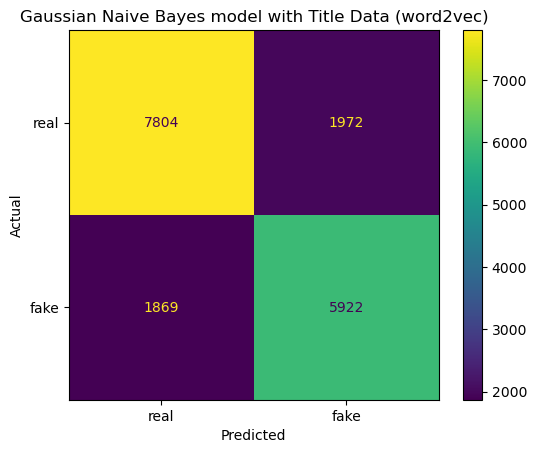

In [33]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Gaussian Naive Bayes model with Title Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [34]:
accuracy=accuracy_score(y_test, y_pred2)
precision=precision_score(y_test, y_pred2)
recall=recall_score(y_test, y_pred2)
f1=f1_score(y_test, y_pred2)
fit_time=end-start

In [35]:
dict = {'data type': 'title',
        'model type':'gaussian Naive Bayes',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [36]:
w2v_text_gnb=pd.DataFrame.from_dict([dict])

In [37]:
w2v_text_gnb

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,gaussian Naive Bayes,word2vec,0.781351,0.75019,0.760108,0.755116,0.125


In [38]:
#save results for later use

%store w2v_text_gnb

Stored 'w2v_text_gnb' (DataFrame)
